In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np


In [2]:
train_abundance = pd.read_csv("MetaCardis_data/new_train_T2D_abundance_with_taxon_ids.csv")
train_metadata = pd.read_csv("MetaCardis_data/train_T2D_metadata.csv")[["SampleID","PATGROUPFINAL_C", "METFORMIN_C"]]

In [3]:
test_abundance = pd.read_csv("MetaCardis_data/new_test_T2D_abundance_with_taxon_ids.csv")
test_metadata = pd.read_csv("MetaCardis_data/test_T2D_metadata.csv")[["SampleID","PATGROUPFINAL_C", "METFORMIN_C"]]

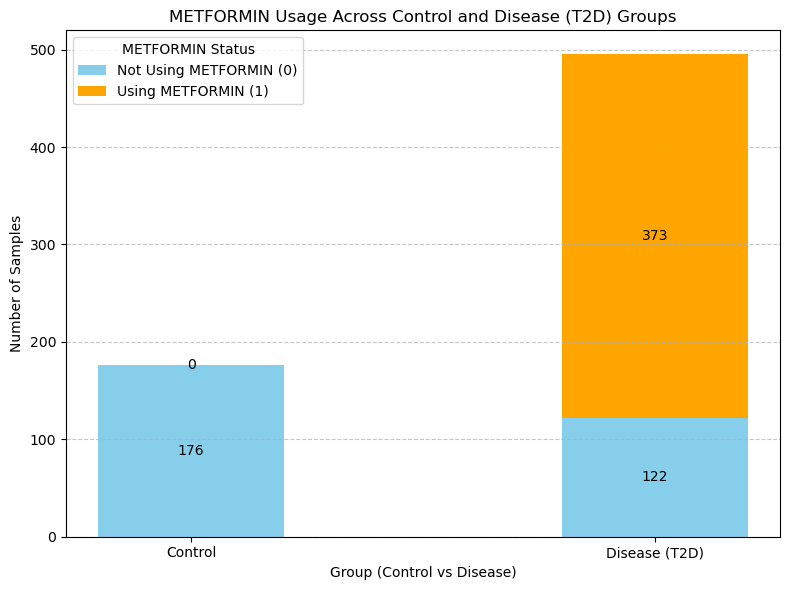

In [7]:
# Prepare data for grouped bar plot
patgroup_1_metformin = train_metadata[train_metadata["PATGROUPFINAL_C"] == 1]["METFORMIN_C"].value_counts()
patgroup_0_metformin = train_metadata[train_metadata["PATGROUPFINAL_C"] == 0]["METFORMIN_C"].value_counts()

# Ensure both categories have values
metformin_1_in_1 = patgroup_1_metformin.get(1, 0)
metformin_0_in_1 = patgroup_1_metformin.get(0, 0)
metformin_1_in_0 = patgroup_0_metformin.get(1, 0)
metformin_0_in_0 = patgroup_0_metformin.get(0, 0)

# Data for plot
labels = ['Control', 'Disease (T2D)']
metformin_0_counts = [metformin_0_in_0, metformin_0_in_1]
metformin_1_counts = [metformin_1_in_0, metformin_1_in_1]

# Plot with annotations
plt.figure(figsize=(8, 6))
bar_width = 0.4
x = range(len(labels))

# Create bars
bar1 = plt.bar(x, metformin_0_counts, width=bar_width, label='METFORMIN 0', color='skyblue')
bar2 = plt.bar(x, metformin_1_counts, width=bar_width, bottom=metformin_0_counts, label='METFORMIN 1', color='orange')

# Add annotations
for i in range(len(x)):
    # Annotate METFORMIN 0 counts
    plt.text(x=i, y=metformin_0_counts[i] / 2, s=str(metformin_0_counts[i]), ha='center', va='center', fontsize=10)
    # Annotate METFORMIN 1 counts
    plt.text(x=i, y=metformin_0_counts[i] + metformin_1_counts[i] / 2, s=str(metformin_1_counts[i]), ha='center', va='center', fontsize=10)

# Final touches
plt.xticks(x, labels)
plt.title('METFORMIN Usage Across Control and Disease (T2D) Groups')
plt.ylabel('Number of Samples')
plt.xlabel('Group (Control vs Disease)')
plt.legend(title='METFORMIN Status', labels=['Not Using METFORMIN (0)', 'Using METFORMIN (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("train_dist.png")

plt.show()


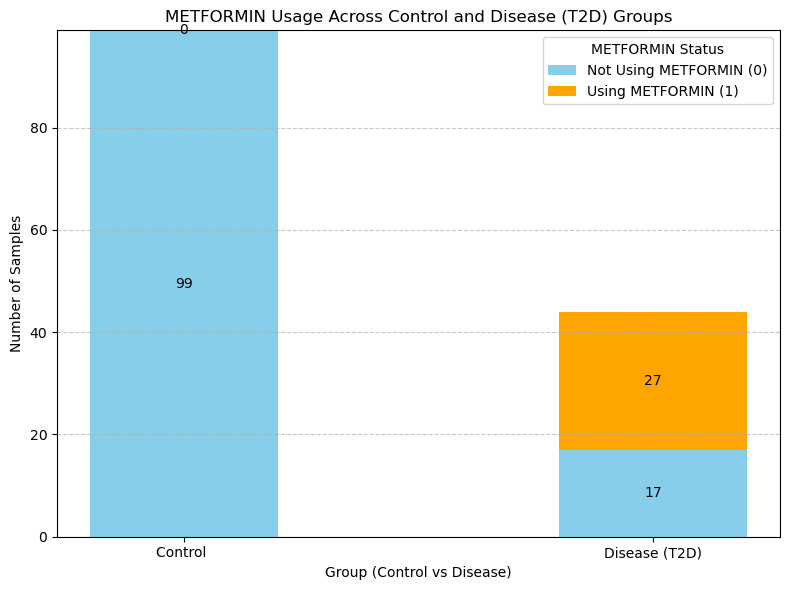

In [8]:
# Prepare data for grouped bar plot
patgroup_1_metformin = test_metadata[test_metadata["PATGROUPFINAL_C"] == 1]["METFORMIN_C"].value_counts()
patgroup_0_metformin = test_metadata[test_metadata["PATGROUPFINAL_C"] == 0]["METFORMIN_C"].value_counts()

# Ensure both categories have values
metformin_1_in_1 = patgroup_1_metformin.get(1, 0)
metformin_0_in_1 = patgroup_1_metformin.get(0, 0)
metformin_1_in_0 = patgroup_0_metformin.get(1, 0)
metformin_0_in_0 = patgroup_0_metformin.get(0, 0)

# Data for plot
labels = ['Control ', 'Disease (T2D)']
metformin_0_counts = [metformin_0_in_0, metformin_0_in_1]
metformin_1_counts = [metformin_1_in_0, metformin_1_in_1]

# Plot with annotations
plt.figure(figsize=(8, 6))
bar_width = 0.4
x = range(len(labels))

# Create bars
bar1 = plt.bar(x, metformin_0_counts, width=bar_width, label='METFORMIN 0', color='skyblue')
bar2 = plt.bar(x, metformin_1_counts, width=bar_width, bottom=metformin_0_counts, label='METFORMIN 1', color='orange')

# Add annotations
for i in range(len(x)):
    # Annotate METFORMIN 0 counts
    plt.text(x=i, y=metformin_0_counts[i] / 2, s=str(metformin_0_counts[i]), ha='center', va='center', fontsize=10)
    # Annotate METFORMIN 1 counts
    plt.text(x=i, y=metformin_0_counts[i] + metformin_1_counts[i] / 2, s=str(metformin_1_counts[i]), ha='center', va='center', fontsize=10)

# Final touches
plt.xticks(x, labels)
plt.title('METFORMIN Usage Across Control and Disease (T2D) Groups')
plt.ylabel('Number of Samples')
plt.xlabel('Group (Control vs Disease)')
plt.legend(title='METFORMIN Status', labels=['Not Using METFORMIN (0)', 'Using METFORMIN (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("test_dist.png")

plt.show()

Top 20 features that are differentiate between T2D and control samples

In [8]:
# Merge datasets on SampleID
merged_data = pd.merge(train_metadata, train_abundance, on="SampleID")

# Extract features and labels
features = merged_data.drop(columns=["SampleID", "PATGROUPFINAL_C", "METFORMIN_C"])
labels = merged_data["PATGROUPFINAL_C"]

# Perform t-tests for each feature
feature_pvalues = {}
for feature in features.columns:
    group0 = features[labels == 0][feature]
    group1 = features[labels == 1][feature]
    t_stat, p_value = ttest_ind(group0, group1, nan_policy='omit')
    feature_pvalues[feature] = p_value

# Sort features by p-value
sorted_features = sorted(feature_pvalues.items(), key=lambda x: x[1])

# Get the top 20 features
top_20_features = [feature for feature, p_value in sorted_features[:10]]

# Print the top 20 features
print("Top 20 features differentiating samples based on PATGROUPFINAL_C:")
print(top_20_features)

Top 20 features differentiating samples based on PATGROUPFINAL_C:
['328814', '187327', '905', '817', '28117', '818', '739', '821', '1396', '105841']


Alistipes_shahii, 

Acidaminococcus_intestini, 

Acidaminococcus_fermentans, 

Bacteroides_fragilis, 

Alistipes_putredinis, 

Bacteroides_thetaiotaomicron, 

Aggregatibacter_segnis, 

Bacteroides_dorei_vulgatus, 

Bacillus_anthracis_cereus_thuringiensis, 

Anaerostipes_caccae

Now do the same thing but just on the ones with metformin 0

In [10]:
# Merge datasets on SampleID
merged_data = pd.merge(train_metadata, train_abundance, on="SampleID")

# Filter data where METFORMIN_C == 0
filtered_data = merged_data[merged_data["METFORMIN_C"] == 0]

# Extract features and labels
features = filtered_data.drop(columns=["SampleID", "PATGROUPFINAL_C", "METFORMIN_C"])
labels = filtered_data["PATGROUPFINAL_C"]

# Perform t-tests for each feature
feature_pvalues = {}
for feature in features.columns:
    group0 = features[labels == 0][feature]
    group1 = features[labels == 1][feature]
    t_stat, p_value = ttest_ind(group0, group1, nan_policy='omit')
    feature_pvalues[feature] = p_value

# Sort features by p-value
sorted_features = sorted(feature_pvalues.items(), key=lambda x: x[1])

# Get the top 20 features
top_20_features = [feature for feature, p_value in sorted_features[:10]]

# Print the top 20 features
print("Top 20 features differentiating samples based on PATGROUPFINAL_C (METFORMIN_C = 0):")
print(top_20_features)

Top 20 features differentiating samples based on PATGROUPFINAL_C (METFORMIN_C = 0):
['905', '187327', '80869', '721785', '909768', '310297', '40214', '40215', '739', '651609']


Acidaminococcus_fermentans, 

Acidaminococcus_intestini, 

Acidovorax_citrulli_avenae, 

Acidovorax_ebreus, 

Acinetobacter_Acinetobacter_calcoaceticus_Acinetobacter_baumannii__ACB__complex, 

Bacteroides_plebeius, 

Acinetobacter_johnsonii, 

Acinetobacter_junii, 

Aggregatibacter_segnis, 

Actinomyces_sp__oral_taxon_180

Now apply +1 and then log transformation on data and then do the same things:

In [7]:
# Merge datasets on SampleID
merged_data = pd.merge(train_metadata, train_abundance, on="SampleID")

# Extract features and labels
features = merged_data.drop(columns=["SampleID", "PATGROUPFINAL_C", "METFORMIN_C"])
labels = merged_data["PATGROUPFINAL_C"]

# Add 1 to all feature values and apply log transformation
features = np.log1p(features)  # log1p computes log(1 + x) element-wise

# Perform t-tests for each feature
feature_pvalues = {}
for feature in features.columns:
    group0 = features[labels == 0][feature]
    group1 = features[labels == 1][feature]
    t_stat, p_value = ttest_ind(group0, group1, nan_policy='omit')
    feature_pvalues[feature] = p_value

# Sort features by p-value
sorted_features = sorted(feature_pvalues.items(), key=lambda x: x[1])

# Get the top 20 features
top_20_features = [feature for feature, p_value in sorted_features[:10]]

# Print the top 20 features
print("Top 20 features differentiating samples based on PATGROUPFINAL_C:")
print(top_20_features)

Top 20 features differentiating samples based on PATGROUPFINAL_C:
['562', '208479', '39485', '33043', '39488', '45851', '2860053', '116085', '187327', '1512']


In [6]:
# Merge datasets on SampleID
merged_data = pd.merge(train_metadata, train_abundance, on="SampleID")

# Filter data where METFORMIN_C == 0
filtered_data = merged_data[merged_data["METFORMIN_C"] == 0]

# Extract features and labels
features = filtered_data.drop(columns=["SampleID", "PATGROUPFINAL_C", "METFORMIN_C"])
labels = filtered_data["PATGROUPFINAL_C"]

# Add 1 to all feature values and apply log transformation
features = np.log1p(features)  # log1p computes log(1 + x) element-wise

# Perform t-tests for each feature
feature_pvalues = {}
for feature in features.columns:
    group0 = features[labels == 0][feature]
    group1 = features[labels == 1][feature]
    t_stat, p_value = ttest_ind(group0, group1, nan_policy='omit')
    feature_pvalues[feature] = p_value

# Sort features by p-value
sorted_features = sorted(feature_pvalues.items(), key=lambda x: x[1])

# Get the top 20 features
top_20_features = [feature for feature, p_value in sorted_features[:10]]

# Print the top 20 features
print("Top 20 features differentiating samples based on PATGROUPFINAL_C (METFORMIN_C = 0):")
print(top_20_features)


Top 20 features differentiating samples based on PATGROUPFINAL_C (METFORMIN_C = 0):
['187327', '905', '80869', '721785', '909768', '739', '328814', '46506', '1656', '310297']
